### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
#                  alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

In [8]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'China': 'red', 
          'Spain': 'yellow',
          'Italy': 'grey', 
          'Iran': 'brown', 
          'UK': 'Purple', 
#           'S.Korea': 'lightgreen', 
          'France': 'violet', 
          'Poland': 'lime', 
          'Argentina': 'Teal',
          'Russia': 'cyan', 
          'Mexico': 'Orange', 
          'Brazil': 'darkgreen', 
#           'Belgium': 'cyan',
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

In [9]:
Deaths = DF.copy()
Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,France,Poland,Argentina,Russia,Mexico,Brazil
2020-11-22,133738,1388152,256866,4742,42619,49823,44802,55120,48807,13618,37002,35838,101676,169183
2020-11-23,134218,1396467,257779,4742,43131,50453,45255,55327,49312,13774,37122,36192,101926,169485
2020-11-24,134699,1409252,259925,4742,43668,51306,45738,55935,50324,14314,37432,36675,102739,170115
2020-11-25,135223,1421308,262222,4742,44037,52028,46207,56630,50700,14988,37714,37173,103597,170769
2020-11-26,135715,1432047,263454,4742,44374,52850,46689,57128,51041,15568,37941,37688,104242,171460


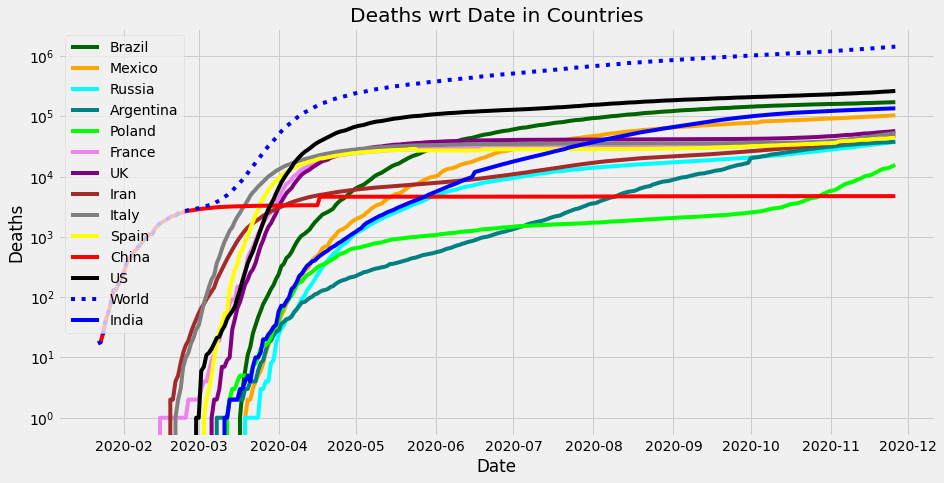

In [10]:
plotter(Deaths, 'Deaths')

In [11]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,France,Poland,Argentina,Russia,Mexico,Brazil
2020-11-22,511,7081,920,0,0,562,475,399,214,330,100,396,303,194
2020-11-23,480,8315,913,0,512,630,453,207,505,156,120,354,250,302
2020-11-24,481,12785,2146,0,537,853,483,608,1012,540,310,483,813,630
2020-11-25,524,12056,2297,0,369,722,469,695,376,674,282,498,858,654
2020-11-26,492,10739,1232,0,337,822,482,498,341,580,227,515,645,691


In [12]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,China,Spain,Italy,Iran,UK,France,Poland,Argentina,Russia,Mexico,Brazil
2020-11-22,525.71,9074.88,1307.48,0.05,231.22,575.25,456.00,406.52,528.78,418.85,233.24,396.28,465.92,457.23
2020-11-23,519.99,8979.90,1258.17,0.04,266.32,582.09,455.62,381.58,525.81,386.00,219.09,390.99,438.93,437.82
2020-11-24,515.12,9455.54,1369.15,0.04,300.15,615.96,459.05,409.88,586.58,405.25,230.45,402.49,485.69,461.84
2020-11-25,516.23,9780.59,1485.13,0.03,308.76,629.21,460.29,445.52,560.26,438.84,236.89,414.43,532.23,485.86
2020-11-26,513.20,9900.40,1453.49,0.03,312.29,653.31,463.00,452.08,532.85,456.49,235.66,427.00,546.32,511.51


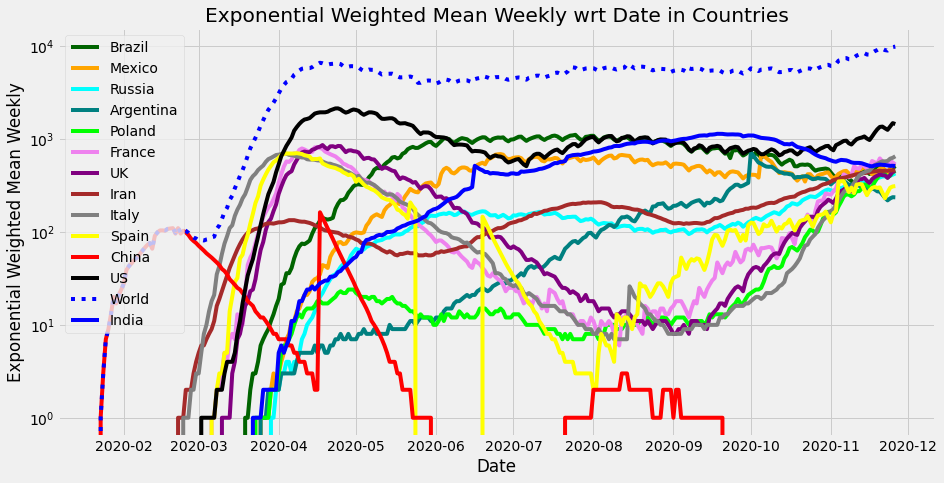

In [13]:
plotter(np.round(AVG), name)

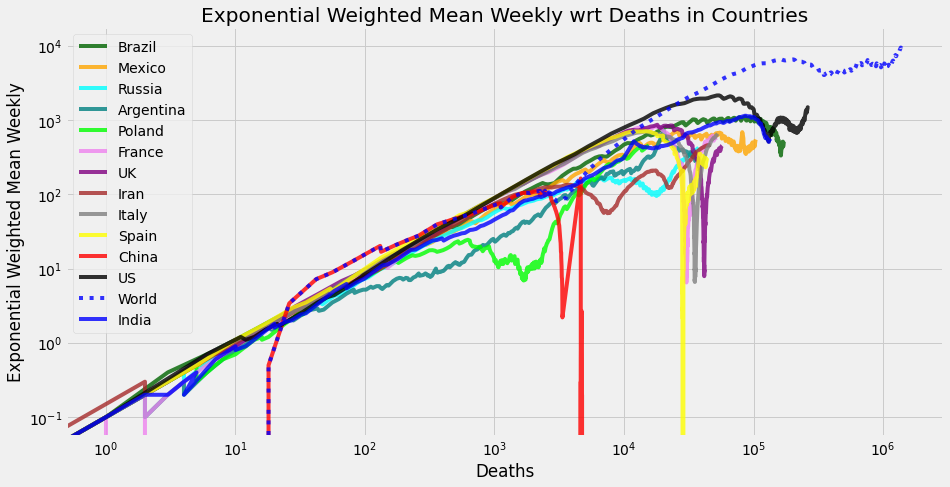

In [14]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

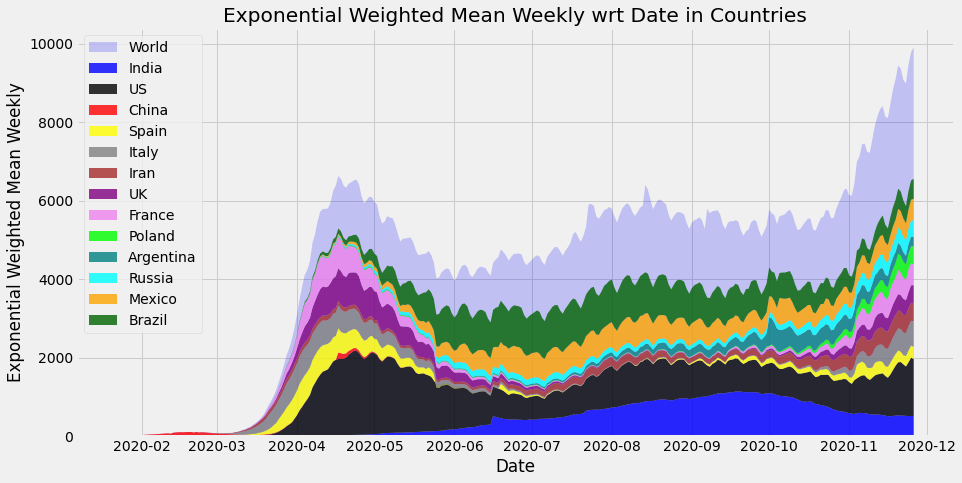

In [15]:
stackplotter(AVG, name)

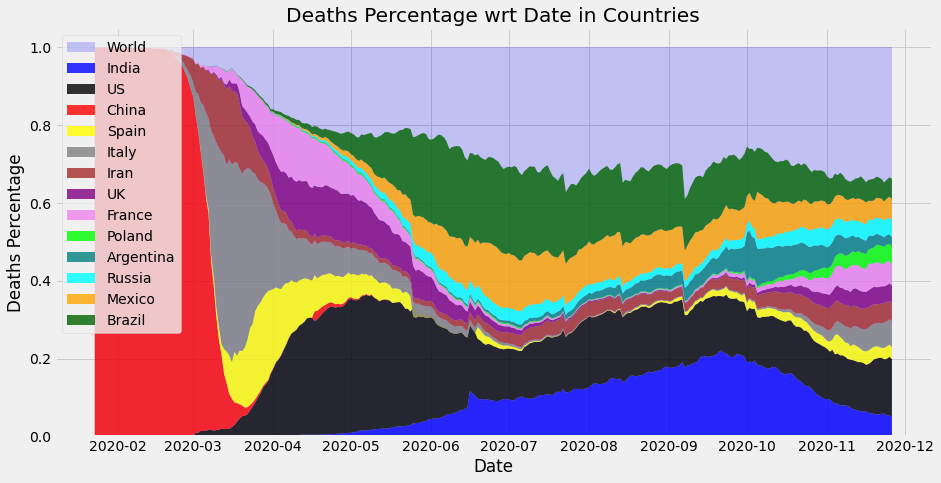

In [16]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [17]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1
Reproductivity[Countries].iloc[-1]
# plt.barh(
#     Countries,
#     Reproductivity[Countries].iloc[-1],
#     color = colors.values()
# )

Country/Region
India        0.9272
World        1.2144
US           1.4201
China        1.0000
Spain        0.9510
Italy        1.6126
Iran         1.0956
UK           1.2245
France       1.1116
Poland       1.6586
Argentina    0.7510
Russia       1.2715
Mexico       1.1678
Brazil       1.1879
Name: 2020-11-26 00:00:00, dtype: float64

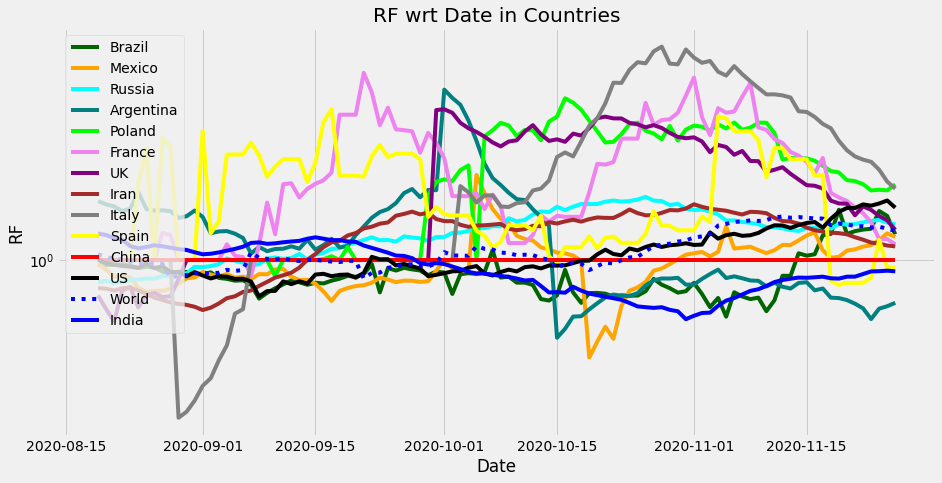

In [18]:
plotter(Reproductivity.tail(100), 'RF')

### Time Adjusted for starting day

In [19]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

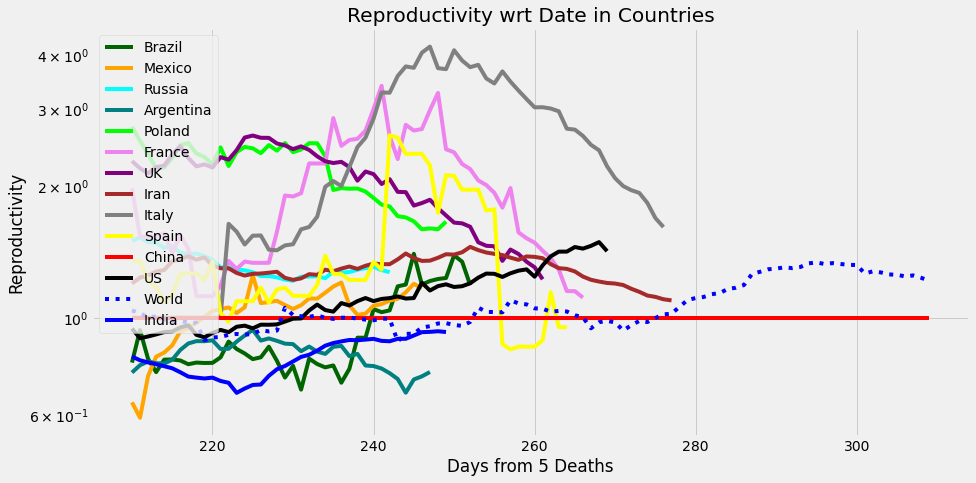

In [20]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

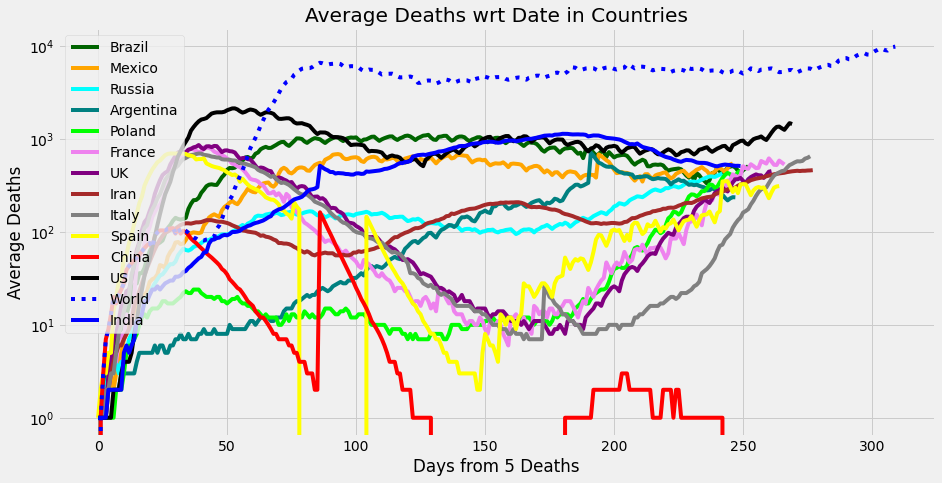

In [21]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

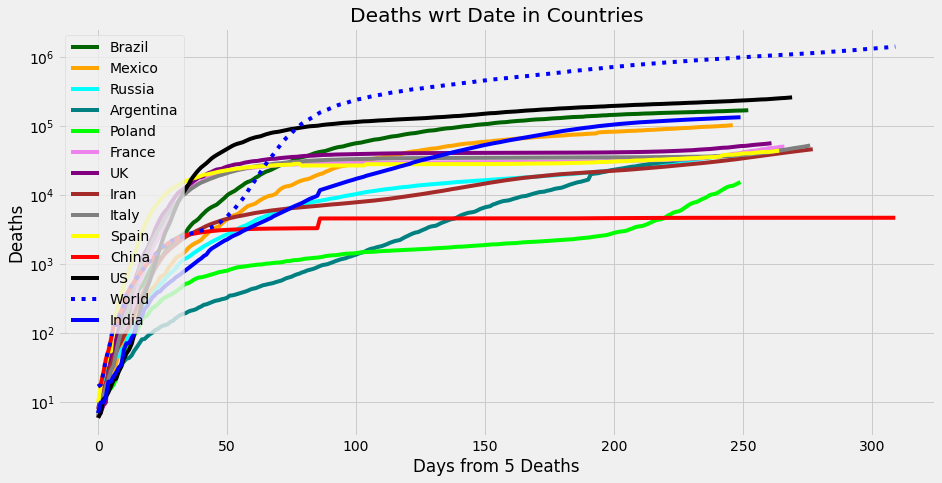

In [22]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [23]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]

In [24]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity
Country,,,,,
World,1432047,10739,10228.71,9900.40,1.2144
US,263454,1232,1550.57,1453.49,1.4201
Brazil,171460,691,485.57,511.51,1.1879
India,135715,492,507.57,513.20,0.9272
Mexico,104242,645,591.14,546.32,1.1678
UK,57128,498,465.43,452.08,1.2245
Italy,52850,822,711.43,653.31,1.6126
France,51041,341,548.57,532.85,1.1116
Iran,46689,482,467.43,463.00,1.0956


In [25]:
LastDay_DF[LastDay_DF['Weekly_Deaths']>300].sort_values('Weekly_Deaths', ascending = False)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity
Country,,,,,
World,1432047,10739,10228.71,9900.40,1.2144
US,263454,1232,1550.57,1453.49,1.4201
Italy,52850,822,711.43,653.31,1.6126
Mexico,104242,645,591.14,546.32,1.1678
France,51041,341,548.57,532.85,1.1116
India,135715,492,507.57,513.20,0.9272
Poland,15568,580,497.14,456.49,1.6586
Brazil,171460,691,485.57,511.51,1.1879
Iran,46689,482,467.43,463.00,1.0956


### Pie Chart

In [26]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:]
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  10228


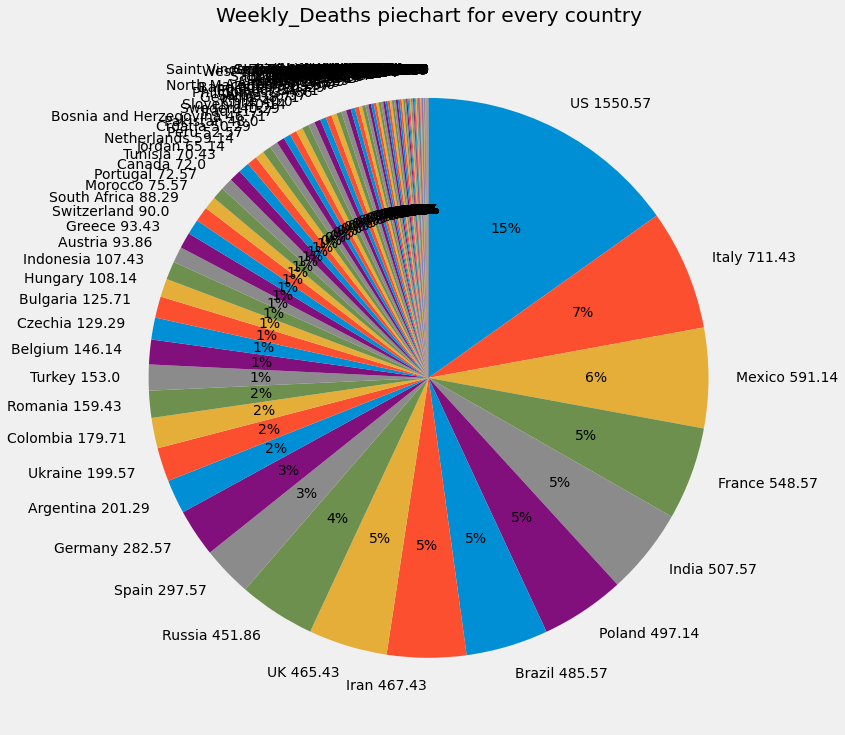

In [27]:
piechart('Weekly_Deaths')

World total:  10739


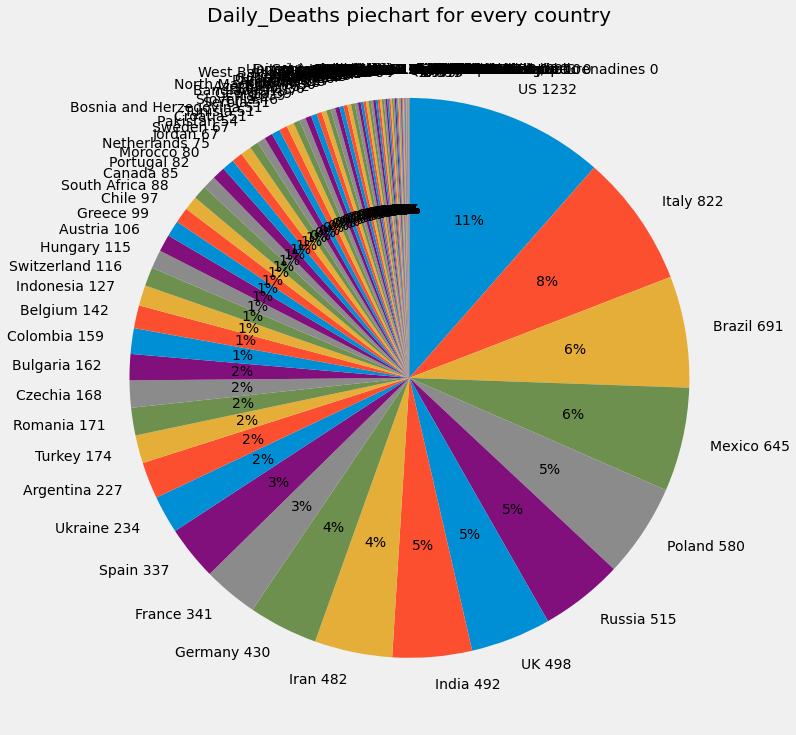

In [29]:
piechart('Daily_Deaths')

In [28]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2020-11-27


In [40]:
a = 0
b = 2

In [41]:
for _ in range(20):
	a = (a+b)%16
	b = (a+b)%16
	print (a, b)

2 4
6 10
0 10
10 4
14 2
0 2
2 4
6 10
0 10
10 4
14 2
0 2
2 4
6 10
0 10
10 4
14 2
0 2
2 4
6 10
